## Classification using Support Vector Machines (SVM)

SVM attempts to divide the dataset into n number of hyperplanes in n-dimensional space. It tries to separate the data by making the margin between two as wide as possible, with the closest points referred to as support vectors. Feature scaling makes for better results with SVM.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')
X = df.iloc[:, 2:4]   # Using 1:2 as indices will give us np array of dim (10, 1)
y = df.iloc[:, 4]

df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [4]:
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

In [5]:
from sklearn.svm import SVC 
classifier = SVC(kernel='linear', random_state=52).fit(X_train, y_train)

Text(0,0.5,'Estimated Salary')

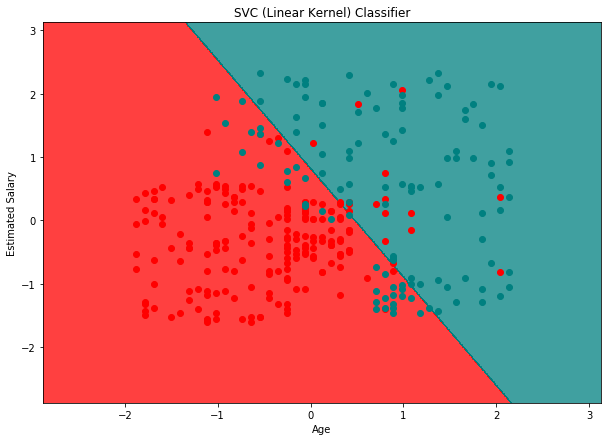

In [9]:
plt.figure(figsize=(10,7))
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train

X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'teal')))
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'teal'))(i), label=j)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.title('SVC (Linear Kernel) Classifier')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')

In [22]:
y_pred_lin = classifier.predict(X_test)

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_lin)
cm

array([[51,  3],
       [ 6, 20]], dtype=int64)

In [14]:
from sklearn.svm import SVC 
classifier_rbf = SVC(kernel='rbf', random_state=52).fit(X_train, y_train)

Text(0,0.5,'Estimated Salary')

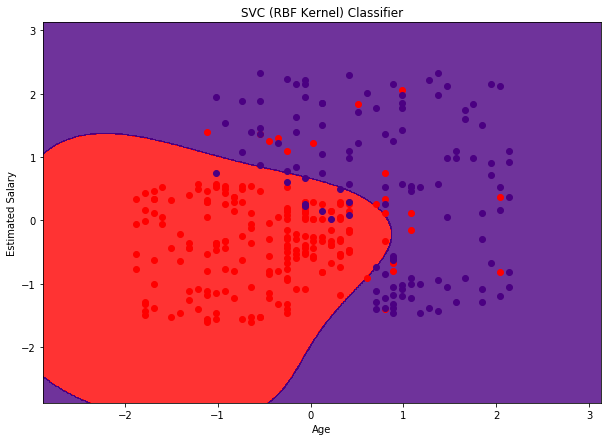

In [17]:
plt.figure(figsize=(10,7))
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train

X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01))

plt.contourf(X1, X2, classifier_rbf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.8, cmap=ListedColormap(('red', 'indigo')))
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'indigo'))(i), label=j)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.title('SVC (RBF Kernel) Classifier')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')

In [24]:
y_pred_rbf = classifier_rbf.predict(X_test)

In [26]:
cm = confusion_matrix(y_test, y_pred_rbf)
cm

array([[50,  4],
       [ 1, 25]], dtype=int64)

In [27]:
from sklearn.svm import SVC 
classifier_poly = SVC(kernel='poly', random_state=0).fit(X_train, y_train)

Text(0,0.5,'Estimated Salary')

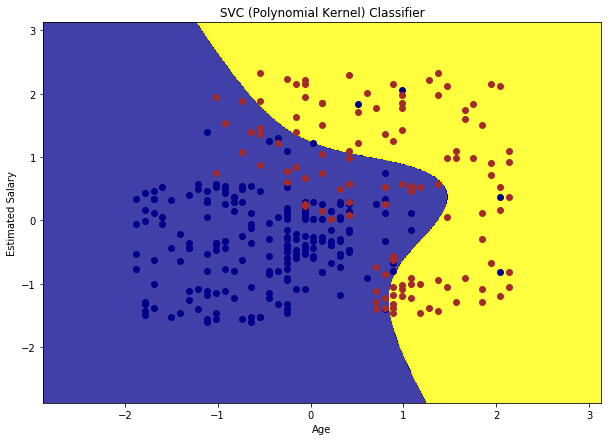

In [35]:
plt.figure(figsize=(10,7))

from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train

X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01))

plt.contourf(X1, X2, classifier_poly.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('darkblue', 'yellow')))
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('darkblue', 'brown'))(i), label=j)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.title('SVC (Polynomial Kernel) Classifier')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')

In [38]:
y_pred_poly = classifier_poly.predict(X_test)

In [39]:
cm = confusion_matrix(y_test, y_pred_poly)
cm

array([[51,  3],
       [ 8, 18]], dtype=int64)